## Human Activity Recognition using Smartphone Data
#### Using **Hidden Markov Model**, classify Human Activity using the smartphone generated data
#### Implement the classification by:
####     a) Using PCA to compress the data to 100 features.
####     b) Using the first 100 features of the dataset.
#### Classify only for the following categories: STANDING, LAYING, SITTING, WALKING.
#### You can choose values of other hyper parameters as per your choice

## importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!pip install hmmlearn
from hmmlearn import hmm
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

     |████████████████████████████████| 120 kB 2.5 MB/s eta 0:00:01


In [2]:

train = pd.read_csv("data/train/train.csv")
test = pd.read_csv("data/test/test.csv")

In [3]:
train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [4]:
test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,WALKING_UPSTAIRS
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,WALKING_UPSTAIRS
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,WALKING_UPSTAIRS
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,WALKING_UPSTAIRS


In [5]:
train["Activity"].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

#### in target we need only STANDING, LAYING, SITTING, WALKING 

In [6]:
# unnecessary rows with unnecessary tragets i.e.(WALKING_UPSTAIRS,WALKING_DOWNSTAIRS) are removed from train data
train = train[train["Activity"]!="WALKING_UPSTAIRS"]
train = train[train["Activity"]!="WALKING_DOWNSTAIRS"]
#train["Activity"].replace({"STANDING":0,"LAYING":1, "SITTING":2, "WALKING":3},inplace=True)
train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7289,0.368741,-0.037037,-0.171345,-0.289275,-0.112248,-0.012563,-0.318009,-0.100526,-0.005713,-0.017236,...,-0.299563,-0.441337,-0.035316,0.519782,0.262583,-0.898166,0.166580,0.000164,30,WALKING
7290,0.283921,-0.026589,-0.119525,-0.275639,-0.082424,-0.067783,-0.319503,-0.073029,-0.072464,0.021704,...,-0.608658,-0.172714,0.598862,0.391946,0.118377,-0.896800,0.168436,0.004581,30,WALKING
7291,0.208795,-0.011955,-0.070286,-0.255750,-0.143239,-0.136999,-0.316191,-0.146158,-0.151520,0.021704,...,-0.337544,0.541563,0.722410,0.438473,0.186591,-0.892379,0.171724,0.005806,30,WALKING
7292,0.207863,-0.019810,-0.051942,-0.278117,-0.136085,-0.082025,-0.334822,-0.154721,-0.079207,-0.148386,...,-0.262697,0.402823,-0.533675,-0.172064,-0.451897,-0.887386,0.174095,-0.000384,30,WALKING


In [7]:
# unnecessary rows with unnecessary tragets i.e.(WALKING_UPSTAIRS,WALKING_DOWNSTAIRS) are removed from test data
test = test[test["Activity"]!="WALKING_UPSTAIRS"]
test = test[test["Activity"]!="WALKING_DOWNSTAIRS"]
#test["Activity"].replace({"STANDING":0,"LAYING":1, "SITTING":2, "WALKING":3},inplace=True)
test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2884,0.259172,-0.008408,-0.083012,-0.483303,-0.130209,-0.305842,-0.488393,-0.181297,-0.301262,-0.392891,...,0.199377,0.365598,0.076656,0.374991,-0.145443,-0.817014,0.172039,0.125107,24,WALKING
2885,0.248799,-0.015695,-0.103801,-0.510188,-0.111773,-0.322375,-0.507802,-0.182804,-0.320156,-0.463048,...,-0.187534,0.947383,-0.338707,-0.806335,0.352414,-0.822527,0.170455,0.121438,24,WALKING
2886,0.247290,-0.024840,-0.141388,-0.593275,-0.124444,-0.427655,-0.614110,-0.196080,-0.430790,-0.508640,...,-0.576973,0.211248,-0.708733,0.271323,-0.529599,-0.819168,0.175519,0.120376,24,WALKING
2887,0.277149,0.003709,-0.113742,-0.594104,-0.093302,-0.441025,-0.626089,-0.136955,-0.424460,-0.514281,...,-0.313433,0.071932,-0.594592,0.482462,0.103639,-0.809132,0.180466,0.125399,24,WALKING


In [8]:
# creating features and labels for train data
X_train = train.drop(columns=["Activity"])
#y_train = train["Activity"]

# creating features and labels for train data
X_test = test.drop(columns=["Activity"])
y_test = test["Activity"]

### a) Using PCA to compress the data to 100 features.

#### PCA (Principal Component Analysis)

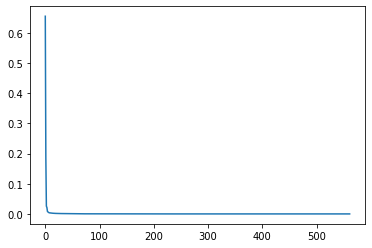

In [9]:
# understanding the Components and their variance ratio
pca = PCA()
pca.fit(X_train)
plt.plot(pca.explained_variance_ratio_)

### Generation of 100 PCA components

In [10]:
# creating 100 Components using PCA
pca = PCA(n_components=100,random_state=1)
pca.fit(X_train)
pca_X_train = pca.transform(X_train)
pca_X_test = pca.transform(X_test)
pca_X_train

array([[ 1.62721682e+01, -4.34009421e+00, -1.60348625e+00, ...,
        -5.81197215e-02, -1.98185666e-01, -7.56082784e-02],
       [ 1.62709666e+01, -4.27872645e+00, -1.96033420e+00, ...,
         9.34387281e-02, -4.15210793e-01,  2.15938312e-02],
       [ 1.62820958e+01, -4.21384326e+00, -2.14108574e+00, ...,
         1.89253310e-01, -1.10381464e-01,  1.36922584e-01],
       ...,
       [-1.17262840e+01,  9.86054752e+00,  4.44159124e-01, ...,
         3.30836985e-02, -1.69592062e-01, -1.27434448e-01],
       [-1.17121239e+01,  9.92841020e+00,  1.64819488e-01, ...,
         4.14385163e-02, -1.83690691e-01,  1.29603413e-01],
       [-1.17351377e+01,  9.62774530e+00,  2.19548318e-03, ...,
        -9.07362660e-02, -3.45003662e-01, -1.54264627e-01]])

In [11]:
pca_X_train.shape

(5293, 100)

## Training the HMM model with 100 PCA components

In [12]:
# creating the Hidden Gaussian Model 
model_1 = hmm.GaussianHMM(n_components=4, covariance_type="full",n_iter=200,random_state=1)

# Training the Hidden Gaussian Model
model_1.fit(pca_X_train)

GaussianHMM(covariance_type='full', n_components=4, n_iter=200, random_state=1)

## Evaluating the training performance of the model_1

In [13]:
# the score function is used to calculate log-likelyhood(which if it is less it is better)
res1 = model_1.score(pca_X_train)
res1

32740.532478332516

In [14]:
# predicteing the posture of human using model_1
m1_pred = model_1.predict(pca_X_test)
m1_pred

array([3, 3, 3, ..., 0, 0, 0])

In [15]:
num_y_test = y_test.replace({"STANDING":3,"LAYING":2, "SITTING":1, "WALKING":0})
a1 = accuracy_score(m1_pred,num_y_test)*100
print(f"accuracy in model_1 is : {a1}%")

accuracy in model_1 is : 42.266536964980546%


## b) Using the first 100 features of the dataset.

In [16]:
# considering only a first 100 columns of data
X_100_train = X_train.iloc[:,:100]
X_100_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.991994,-0.993119,0.989835,0.991957,0.990519,-0.993522,-0.999935,-0.999820,-0.999878,-0.994364
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.979068,-0.992257,0.992577,0.991808,0.988539,-0.991394,-0.999960,-0.999640,-0.999845,-0.993863
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.979068,-0.992257,0.988390,0.991808,0.988539,-0.988148,-0.999894,-0.999636,-0.999795,-0.987846
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.991786,-0.989769,0.988390,0.992544,0.993218,-0.992868,-0.999924,-0.999803,-0.999883,-0.994678
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.991818,-0.989769,0.994303,0.992544,0.985609,-0.993832,-0.999969,-0.999820,-0.999860,-0.995888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7289,0.368741,-0.037037,-0.171345,-0.289275,-0.112248,-0.012563,-0.318009,-0.100526,-0.005713,-0.017236,...,-0.561730,-0.607600,0.165481,0.473000,0.590212,-0.273758,-0.810249,-0.611987,-0.852815,-0.349518
7290,0.283921,-0.026589,-0.119525,-0.275639,-0.082424,-0.067783,-0.319503,-0.073029,-0.072464,0.021704,...,-0.561730,-0.593166,-0.028561,0.459981,0.504616,-0.248237,-0.785755,-0.619187,-0.836825,-0.319747
7291,0.208795,-0.011955,-0.070286,-0.255750,-0.143239,-0.136999,-0.316191,-0.146158,-0.151520,0.021704,...,-0.631104,-0.593166,-0.028561,0.459981,0.504616,-0.279673,-0.761864,-0.698199,-0.855233,-0.287514
7292,0.207863,-0.019810,-0.051942,-0.278117,-0.136085,-0.082025,-0.334822,-0.154721,-0.079207,-0.148386,...,-0.548093,-0.453602,0.028750,0.589624,0.500954,-0.275370,-0.764280,-0.684826,-0.842111,-0.406419


## Training the HMM model with first 100 columns without any processing

In [17]:
# creating the Hidden Gaussian Model 
model_2 = hmm.GaussianHMM(n_components=4, covariance_type="full", n_iter=200,random_state=1)

# Training the Hidden Gaussian Model
model_2.fit(X_100_train)

GaussianHMM(covariance_type='full', n_components=4, n_iter=200, random_state=1)

## Evaluating the training performance of the model_2

In [18]:
# the score function is used to calculate log-likelyhood(which if it is less it is better)
res2 = model_2.score(X_100_train)
res2

1531745.0665422976

In [19]:
# predicteing the posture of human using model_2
m2_pred = model_1.predict(X_test.iloc[:,:100])
m2_pred

array([3, 3, 3, ..., 3, 3, 3])

In [20]:
a2 = accuracy_score(m2_pred,num_y_test)*100
print(f"accuracy in model_2 is : {a2}%")

accuracy in model_2 is : 23.638132295719842%


## Result

In [23]:
print(f"""the model_1 score is : {res1}\nthe model_1 test_accuracy is : {a1}%\n\nthe model_2 score is : {res2}\nthe model_2 test_accuracy is : {a2}%\n
the model_1 trained with pca without information-loss is better than model_2 trained with only part of data""")

the model_1 score is : 32740.532478332516
the model_1 test_accuracy is : 42.266536964980546

the model_2 score is : 1531745.0665422976
the model_2 test_accuracy is : 23.638132295719842

the model_1 trained with pca without information-loss is better than model_2 trained with only part of data
